#Продвинутый Python, ДЗ-3

Правила игры:

В домашке 8 задач, разбаловка указана в задании. Суммарно за дз можно получить 100 баллов, что равняется 10 баллам

Дедлайн - 7 дней после выдачи дз. Необходимо залить решеннный ноутбук в github и прислать ссылку в Anytask (без выполнения любого из пунктов работа проверяться не будет)

В данной домашке нужно рисовать графики с помощью matplotlib или же seaborn. Обратите внимание, что все графики и оси должны быть подписаны, графики должны выглядеть аккуратно (за это будем штрафовать)

## Данные

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут в файле archive.zip

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c13338ec506413b60bf2b3d9aa5f463e1ecf98fafec64c6fca97161badbc660d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget
from dateutil.parser import parse

url = 'https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip'
filename = wget.download(url)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./')

customers = pd.read_csv('olist_customers_dataset.csv')
location = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с португальского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем!

## Задание 1 (20 баллов)

Визуализируйте зависимость между средним числом покупок товара и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

Для подсчета среднего числа покупок нужно посчитать по каждому товару число продаж, а затем взять среднее от него (учтите, что мы считаем только доставленные заказы)

In [3]:
merged_table = pd.merge(orders, items, on=['order_id'])
avg_orders = merged_table[merged_table.order_status == 'delivered'].groupby(['product_id']).agg({'order_id': 'count'}).reset_index()
data = pd.merge(avg_orders, products, on=['product_id'])
data_1 = data.groupby(['product_photos_qty']).agg({'order_id': 'mean'}).reset_index().rename(columns = {'product_photos_qty': 'number_of_photos', 'order_id': 'average_number_of_orders'})
data_2 = data.groupby(pd.cut(data['product_description_lenght'], np.arange(0, data['product_description_lenght'].max(), 20))).agg({'order_id': 'mean'})[["order_id"]].reset_index().rename(columns = {'order_id': 'average_number_of_orders'})
data_3 = data.groupby(pd.cut(data['product_name_lenght'], np.arange(0, data['product_name_lenght'].max(), 5))).agg({'order_id': 'mean'})[["order_id"]].reset_index().rename(columns = {'order_id': 'average_number_of_orders'})

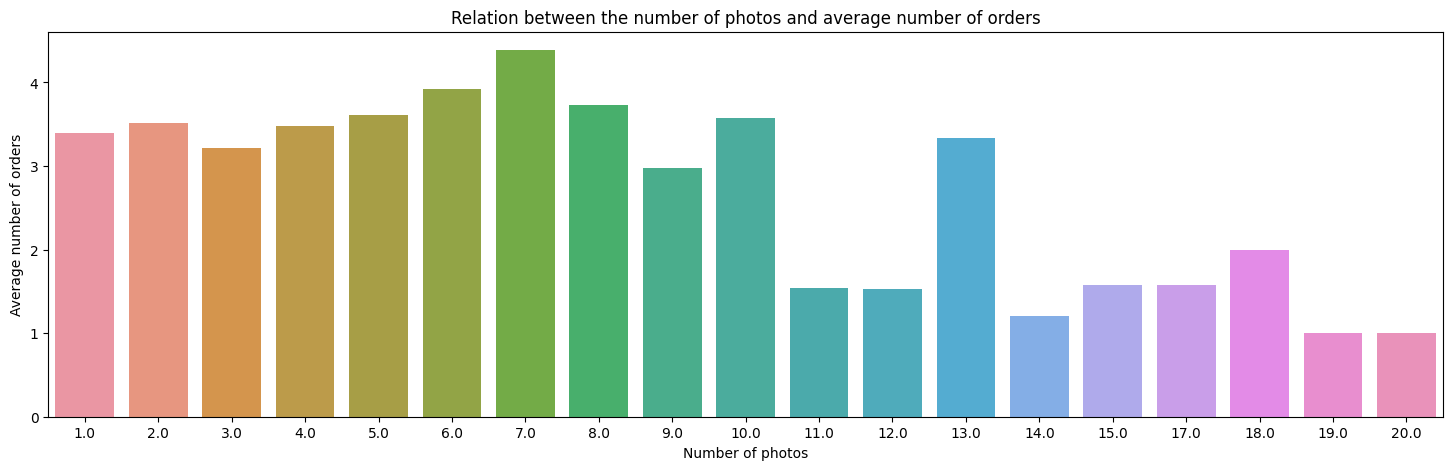

In [4]:
plt.figure(figsize=(18, 5))
plot_1 = sns.barplot(data=data_1, x='number_of_photos', y='average_number_of_orders')
plot_1.set_title('Relation between the number of photos and average number of orders')
plot_1.set_xlabel('Number of photos')
plot_1.set_ylabel('Average number of orders')
plt.show()

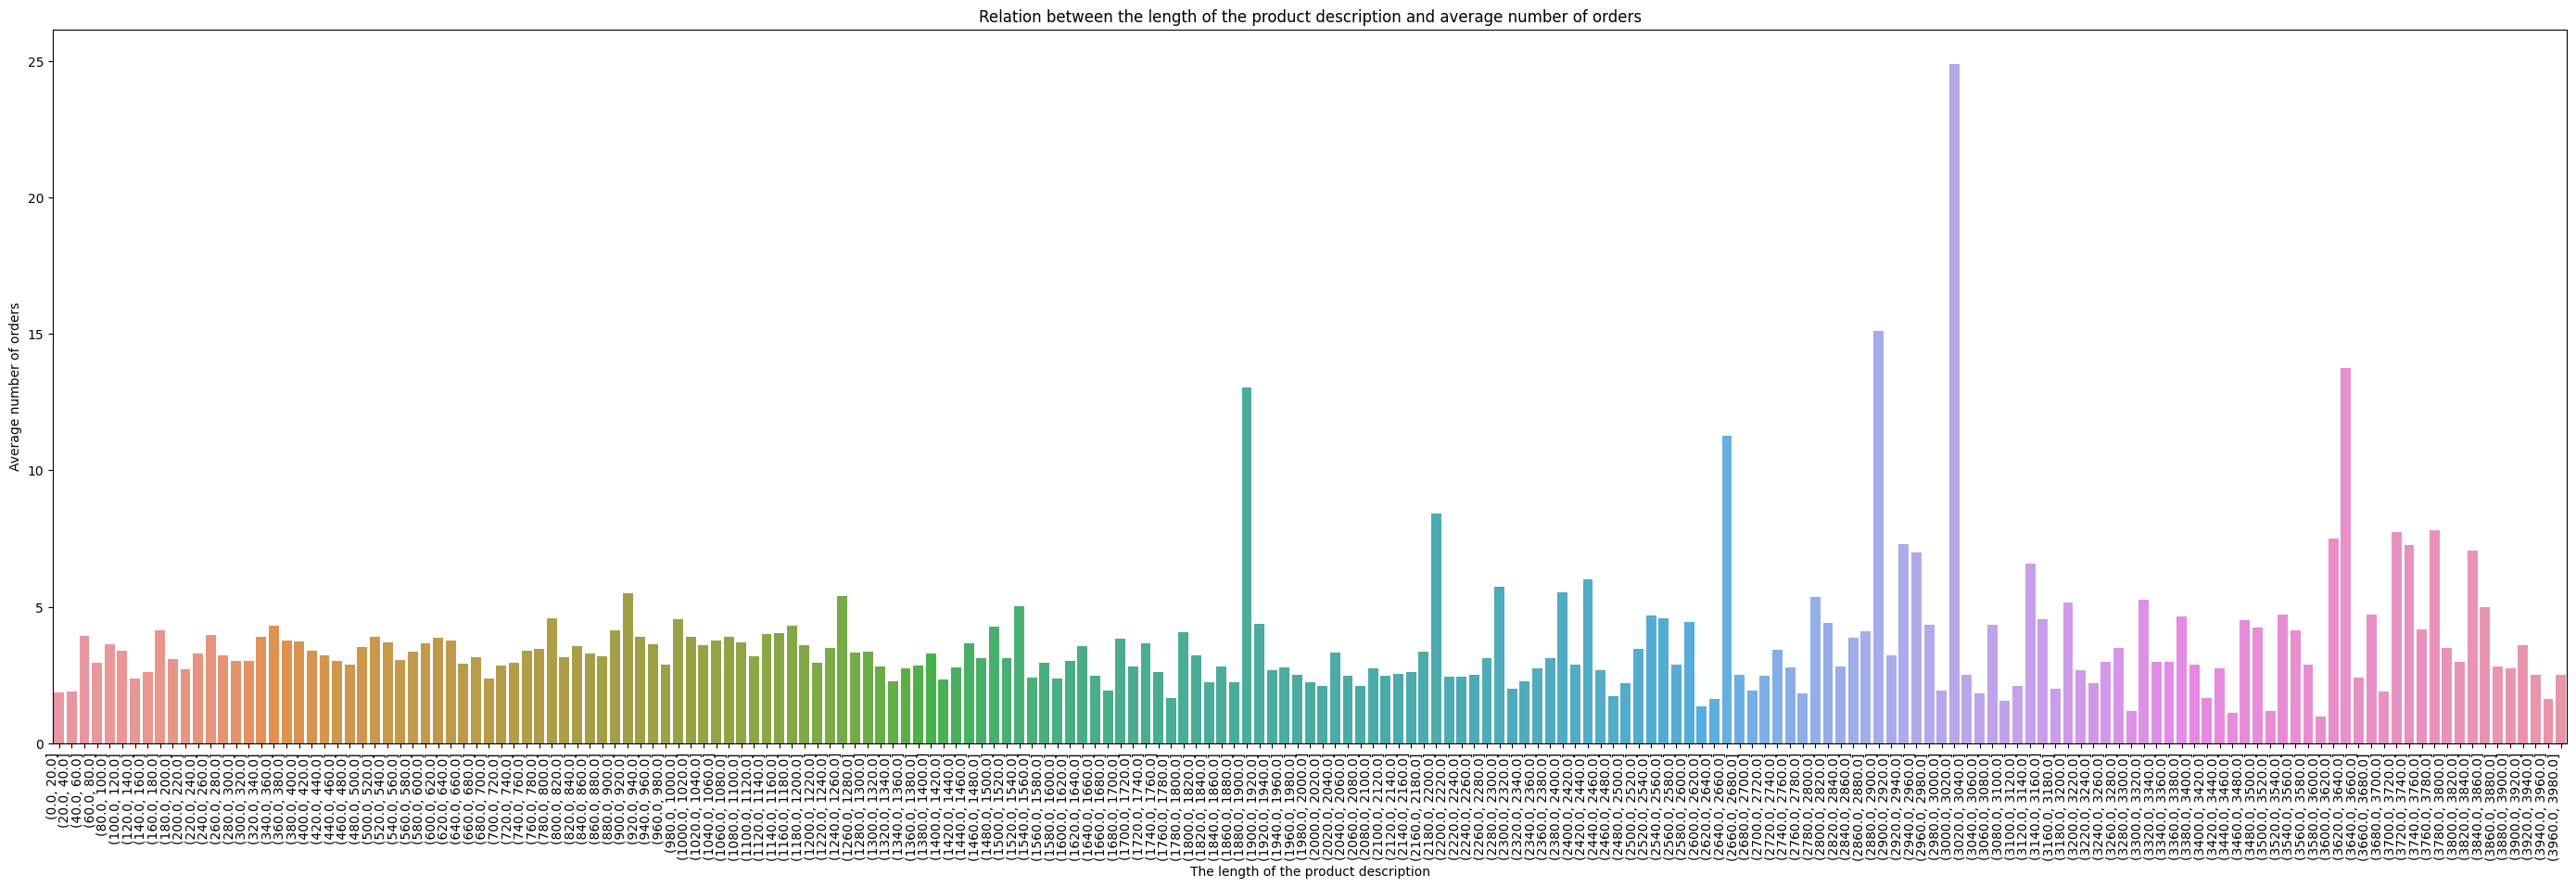

In [5]:
plt.figure(figsize=(35, 10))
plot_2 = sns.barplot(data=data_2, x='product_description_lenght', y='average_number_of_orders')
plot_2.set_title('Relation between the length of the product description and average number of orders')
plot_2.set_xlabel('The length of the product description')
plot_2.set_ylabel('Average number of orders')
plt.xticks(rotation=90, ha='right')
plt.show()

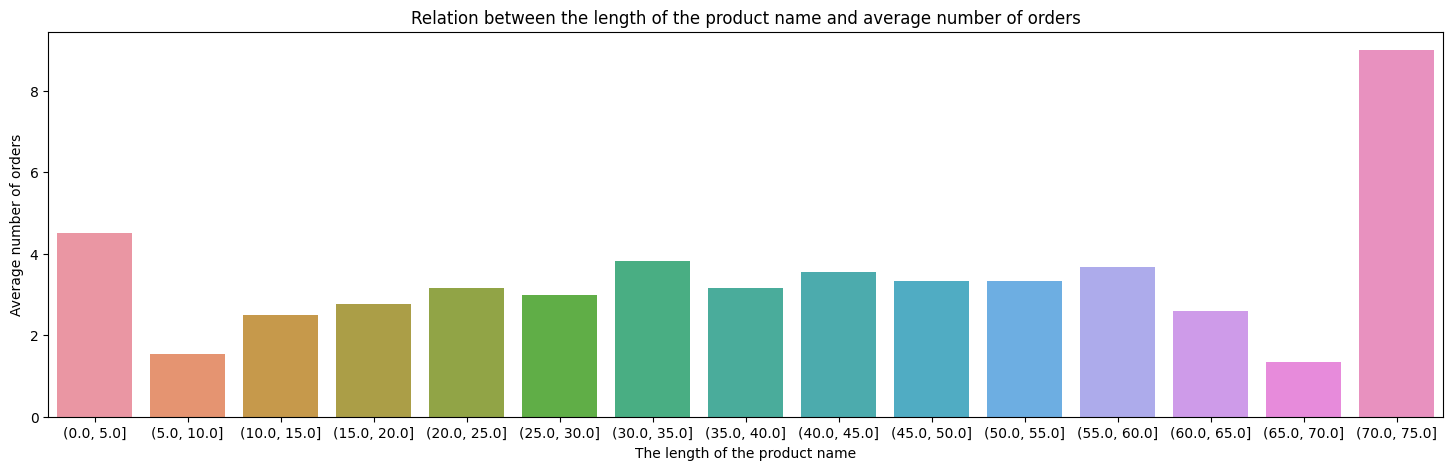

In [7]:
plt.figure(figsize=(18, 5))
plot_3 = sns.barplot(data=data_3, x='product_name_lenght', y='average_number_of_orders')
plot_3.set_title('Relation between the length of the product name and average number of orders')
plot_3.set_xlabel('The length of the product name')
plot_3.set_ylabel('Average number of orders')
plt.show()

## Задание 2 (10 баллов)

Отобразите среднюю сумму оплаты по типу оплаты (для этого вам нужна табличка payments)

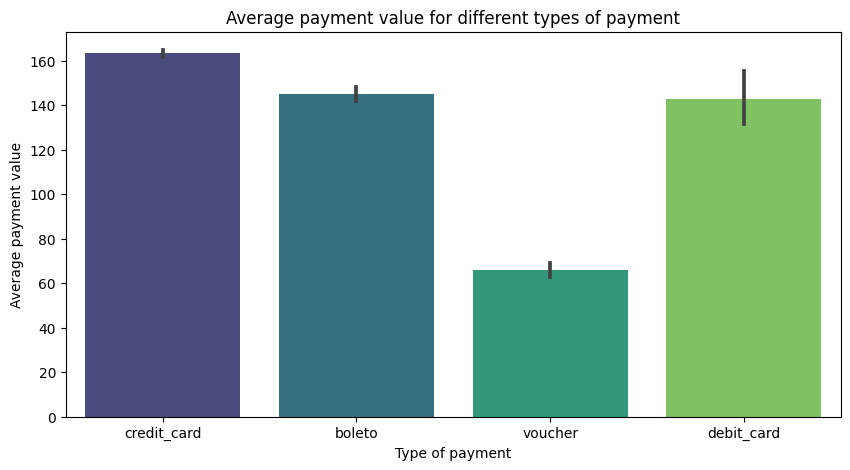

In [ ]:
plt.figure(figsize=(10, 5))
payments = payments[payments.payment_type != 'not_defined']
plot_task2 = sns.barplot(data=payments, x='payment_type', y='payment_value', palette = "viridis")
plot_task2.set_title('Average payment value for different types of payment')
plot_task2.set_xlabel('Type of payment')
plot_task2.set_ylabel('Average payment value')
plt.show()

## Задание 3 (25 баллов)

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть? (Обратите внимание, что в данных есть определенная бага, которую нужно расследовать и учесть)

Также покажите средний чек в зависимости от числа оплат. Есть ли какая-то связь между ними?

In [32]:
items = items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
merged_table = pd.merge(items, payments, on = ['order_id'])

Проанализируем полученную таблицу, чтобы разобраться с тем, что нам нужно сделать. Для начала посмотрим на строки, где payment_sequential > 1:





In [17]:
merged_table[merged_table.payment_sequential > 1][merged_table.payment_installments > 1].head()

<ipython-input-17-40135f821c46>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_table[merged_table.payment_sequential > 1][merged_table.payment_installments > 1].head()


,order_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
1099,02d0cd05f04ab2e3c1acc473b0abc865,49.0,37.04,2,credit_card,2,29.64
1267,033ccfbdfc4d29677b7e1e6df3a82820,49.0,10.96,2,credit_card,3,38.44
1651,041f09bbcd85d178903f5bb71f11a02e,219.8,59.40,2,credit_card,8,141.37
2351,05d885b852158b0280c4abe2cd5108b4,997.8,42.84,2,credit_card,4,400.00
2368,05e6501cdfbd86fe9a3a788c3d411091,75.0,13.55,2,credit_card,4,44.28


In [18]:
merged_table[merged_table.order_id == '05d885b852158b0280c4abe2cd5108b4']

,order_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
2351,05d885b852158b0280c4abe2cd5108b4,997.8,42.84,2,credit_card,4,400.00
2352,05d885b852158b0280c4abe2cd5108b4,997.8,42.84,1,credit_card,5,640.64


Заметим, что каждый заказ в табличке встречается n раз, где n - количество payment_sequential, а если мы сложим значения payment_value по всем payment_sequential для некоторого order_id , то получим payment value, то есть общую сумму заказа. Значит, payment_sequential отражает количество платежей.


Теперь посмотрим на строки, где payment_installments > 1:

In [19]:
merged_table[merged_table.payment_installments > 1].head()

,order_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1,credit_card,3,218.04


In [20]:
merged_table[merged_table.order_id == '000229ec398224ef6ca0657da4fc703e']

,order_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
2,000229ec398224ef6ca0657da4fc703e,199.0,17.87,1,credit_card,5,216.87


Payment_installments - это число платежей внутри одной оплаты, то есть по сути количество периодов в рассрочке (но не для целого заказа, а для отдельных сумм). Однако этот столбец в отличие от payment_sequential не отражает число именно совершенных платежей (это ясно по столбцу payment_value, как уже было сказано). Значит, этот столбец для анализа нам не нужен.

In [35]:
merged_table = merged_table.groupby(['order_id', 'price']).agg({'payment_sequential': 'max'}).reset_index()

In [37]:
payments = merged_table[merged_table.payment_sequential >= 1].groupby('payment_sequential').agg({'price': 'mean'}).reset_index()

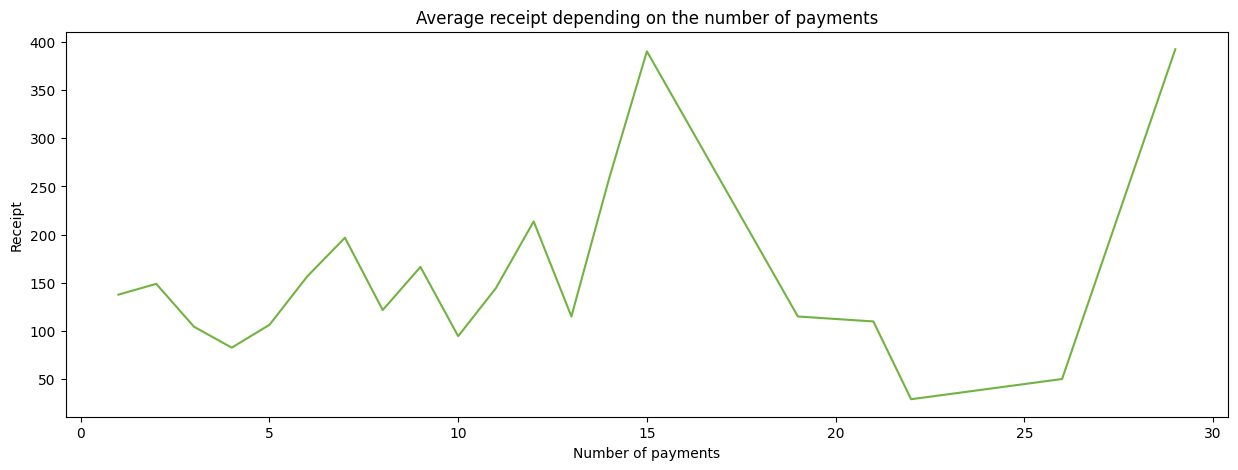

In [39]:
plt.figure(figsize=(15, 5))
plot_task3 = sns.lineplot(data=payments, x='payment_sequential', y='price', color='#71B340')
plot_task3.set_title('Average receipt depending on the number of payments')
plot_task3.set_xlabel('Number of payments')
plot_task3.set_ylabel('Receipt')
plt.show()

Из графика заметно, что при меньших значениях числа оплат цена заказа в среднем тоже меньше, есть также участок, на котором при росте числа оплат цена заказа достигает все бОльшее и бОльшее значение - это вполне очевидно: когда цена выше, покупатель хочет разбить чек на несколько платежей. Однако затем в какой-то момент идет спад цены, несмотря на повышение числа оплат. Выраженной зависимости не наблюдается

## Задание 4 (15 баллов)

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [ ]:
data = items.groupby(['order_id']).agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
merged_table = pd.merge(data, orders, on=['order_id'])
merged_table = pd.merge(merged_table, customers, on=['customer_id'])

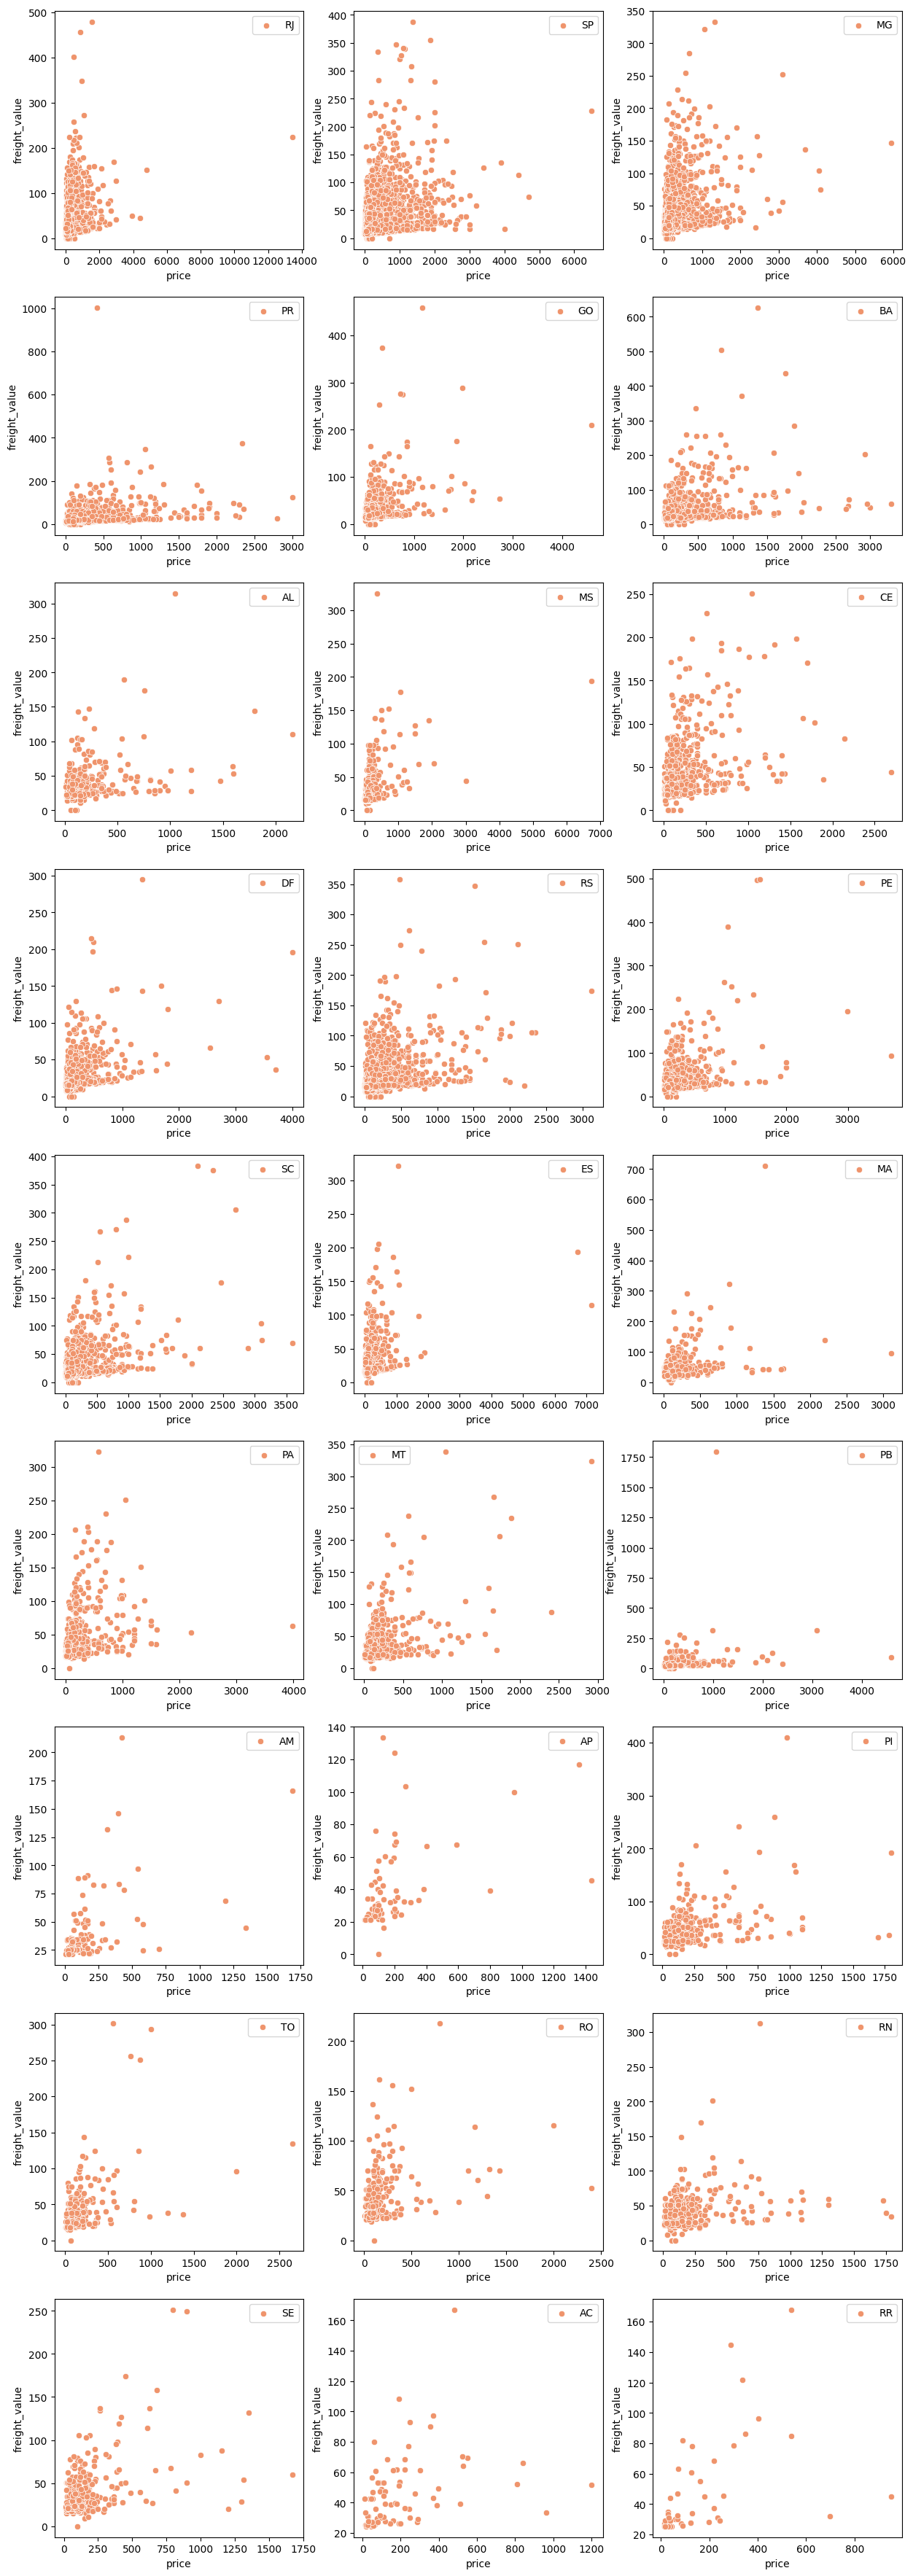

In [ ]:
cols = ['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR']

plt.figure(figsize=(15, 45))
for i, col in enumerate(cols):
    plt.subplot(9, 3, i + 1)
    sns.scatterplot(data=merged_table[merged_table.customer_state == col], x='price', y="freight_value", color='#EF946C')
    plt.legend([col])
plt.show()

Из графиков видно несколько прослеживаемых тенденций:

*   При низких ценах заказа доставка как правило тоже стоит недорого - связано это вероятно с тем, что заказ сам по себе маленький/не ценный и для его доставки не нужно особо заморачиваться
*  Однако на графике есть точки, выбивающиеся из этой закономерности - связно это может быть с тем, что доставка осуществляется в другой штат, и несмотря на то что заказ недорогой, издержки повышаются просто из-за большого расстояния, то есть тут уже сложнее логистика => выше цена





## Задание 5 (15 баллов)

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку? (оценки берутся из таблицы reviews)

In [27]:
merged_table = pd.merge(orders, reviews, on=['order_id'])
merged_table = merged_table.dropna(subset=['order_delivered_customer_date'])
merged_table['order_delivered_customer_date'] = merged_table['order_delivered_customer_date'].apply(lambda x: parse(x))
merged_table['order_estimated_delivery_date'] = merged_table['order_estimated_delivery_date'].apply(lambda x: parse(x))
merged_table['delivered_in_time'] = merged_table.order_delivered_customer_date <= merged_table.order_estimated_delivery_date
merged_table = merged_table.groupby(['review_score', 'delivered_in_time']).agg({'order_id': 'count'}).reset_index()

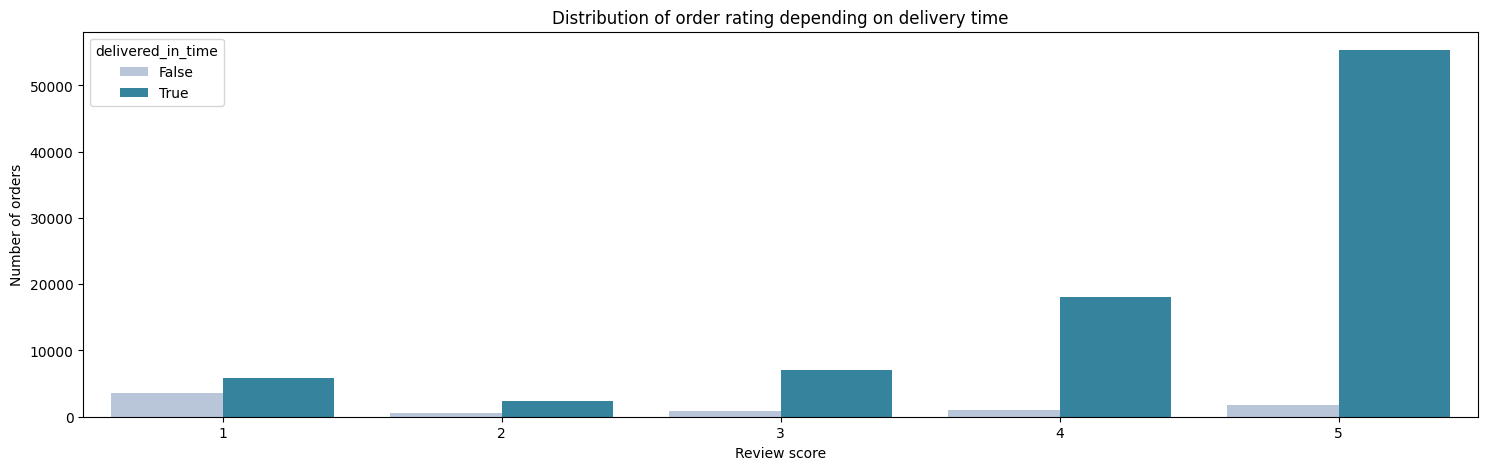

In [28]:
plt.figure(figsize=(18, 5))
plot_task5 = sns.barplot(data=merged_table, x='review_score', y = 'order_id', hue = 'delivered_in_time', palette = "PuBuGn")
plot_task5.set_title('Distribution of order rating depending on delivery time')
plot_task5.set_xlabel('Review score')
plot_task5.set_ylabel('Number of orders')
plt.show()

Заметно, что количество опоздавших заказов, на которые оставили отызвы, меньше: связано это вероятно с тем, что чаще все-таки заказы доставляют вовремя.

Если посмотрим на опоздавшие заказы, то увидим, что выше всего столбец, соответстующий самой низкой оценке, а на втором месте - столбец с самой высокой. Довольно интересное распределение: связано оно вероятно с тем, что некоторым людям сильно не понравилась задежка, а для других либо она показалась незначительной (и хорошее качество товара ее перекрыло), либо продавец пошел навстречу и сделал скидку/отправил какой-то подарок, и покупатель в итоге остался доволен.

У заказов, доставленных вовремя, преобладает оценка 5 - то есть продавцы на маркетплейсе предоставляют качественные товары, и люди удовлетворены заказами и быстротой их доставки.

Таким образом, факт опоздания довольно сильно влияет на оценку

## Задание 6 (15 баллов)

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [42]:
merged_table = pd.merge(items, orders, on=['order_id'])
merged_table = pd.merge(merged_table, sellers, on=['seller_id'])
merged_table = pd.merge(merged_table, customers, on=['customer_id'])
merged_table['order_from_other_state'] = merged_table.customer_state != merged_table.seller_state
merged_table = merged_table.groupby(['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_from_other_state']).agg({'price': 'sum'}).reset_index()
merged_table['order_purchase_timestamp'] = merged_table['order_purchase_timestamp'].apply(lambda x: parse(x))
merged_table['order_delivered_customer_date'] = merged_table['order_delivered_customer_date'].apply(lambda x: parse(x))
merged_table['waiting_time'] = (merged_table.order_delivered_customer_date - merged_table.order_purchase_timestamp).dt.days

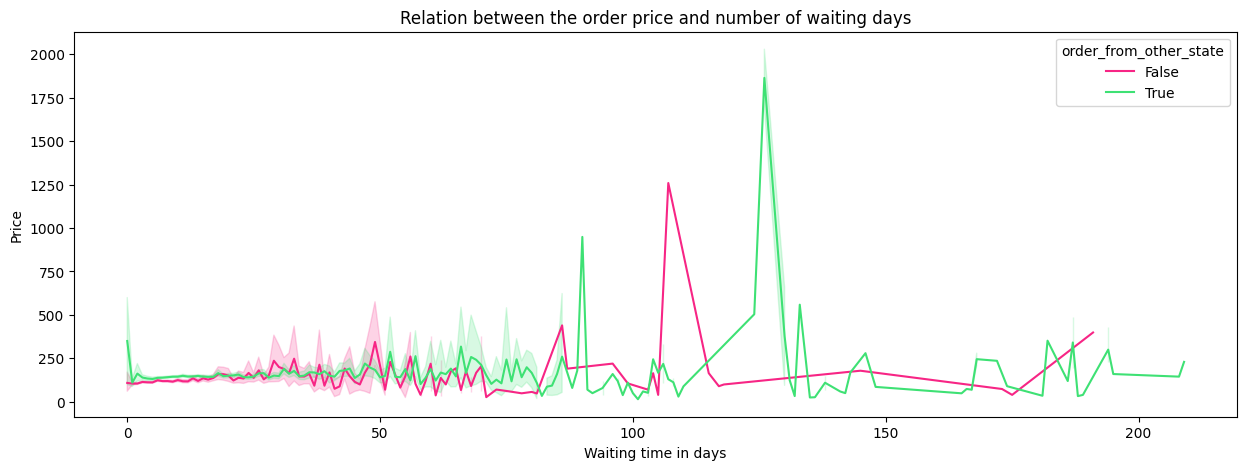

In [45]:
plt.figure(figsize=(15, 5))
plot_task6 = sns.lineplot(data=merged_table, x = 'waiting_time', y = 'price', hue = 'order_from_other_state', palette=["#F72585", "#3EE174"])
plot_task6.set_title('Relation between the order price and number of waiting days')
plot_task6.set_xlabel('Waiting time in days')
plot_task6.set_ylabel('Price')
plt.show()

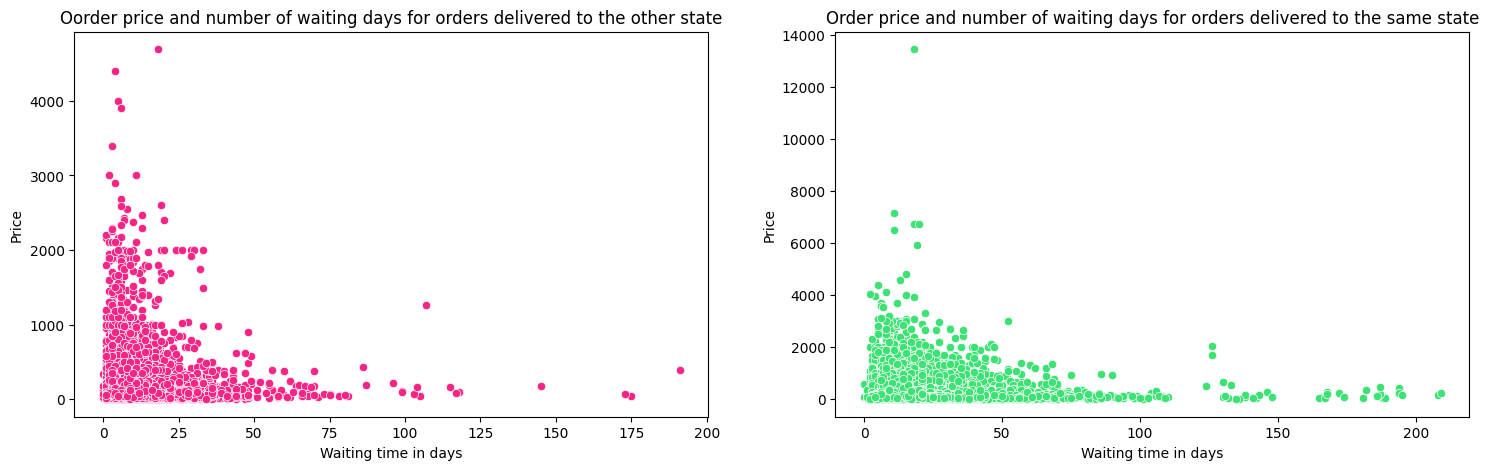

In [62]:
plt.figure(figsize=(18, 5))
plt.subplot(121)
subpl1_task6 = sns.scatterplot(data=merged_table[merged_table.order_from_other_state == False], x = 'waiting_time', y = 'price', color="#F72585")
subpl1_task6.set_title('Oorder price and number of waiting days for orders delivered to the other state')
subpl1_task6.set_xlabel('Waiting time in days')
subpl1_task6.set_ylabel('Price')
plt.subplot(122)
subpl2_task6 = sns.scatterplot(data=merged_table[merged_table.order_from_other_state == True], x = 'waiting_time', y = 'price', color="#3EE174")
subpl2_task6.set_title('Order price and number of waiting days for orders delivered to the same state')
subpl2_task6.set_xlabel('Waiting time in days')
subpl2_task6.set_ylabel('Price')
plt.show()

График наглядо демонстрирует, что для заказов, отправленных в другой штат, во-первых, средняя цена немного выше. Кроме того, видно, что заказы, доставляемые внутри одного штата, приходят быстрее (розовая линия сосредоточена в основном в промежутке от 0 до 100 - дальше уже идут единичные значения, связанные вероятно с какими-то накладками - это помжно понять по тому, что становится меньше изломов). Заказы, доставленные в другой штат, распределены довольно равномерно, однако все-таки их немного больше тоже на интервале от 0 до 100, то есть несмотря на удаленность продавцы стараются как можно быстрее доставить товар. Однако и после 100 значений немало (по сравнению с доставленными в тот же штат) - вероятно, они отражают заказы, доставляемые в наиболее удаленные от штаты отправки места. Выводы подтверждаются точечными графиками.

Для заказов, доставляемых в другой штат, цена отправки выше, чем для тех, которые доставляют внутри одного штата - это видно по тому, что в основном зеленая линия графика располагается чуть выше розовой (и в scatter plots все тоже наглядно видно). Значит, зависимость есть